In [23]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
import re
import string

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [24]:
# Loading social media data from CSV file into a Pandas DataFrame
df = pd.read_csv('/workspaces/Midterm-CSC423-19S01ACS009/adidas_tweets.csv', encoding='latin1')

# Displaying the first 20 rows of the DataFrame to verify the data has been loaded successfully
df.head(20)

,text
0,#AlAire En #OrgulloPaís hablamos de Apify Clou...
1,Check out my Apify profile and see how I'm aut...
2,"@apify Damn, went back home one day too early ??"
3,apify-sdk-python  The Apify SDK for Python is...
4,"@colbyfayock @vercel @apify VM, where only Doc..."
5,Happy st. Patrick's Day! ?? Here's a peak of a...
6,@tomosman @bramk @bardeenai Or Apify into Airt...
7,@PetrSabrnak @vercel @apify Do you use somethi...
8,@erikboderek @apify This is personal because i...
9,@tehseowner @apify product launch incoming or ...


In [25]:
# Download the NLTK stopwords list
nltk.download('stopwords')

# Define a function to clean the text data
def clean_text(text):
    # Remove URLs using regular expressions
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation marks and symbols
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert the text to lowercase
    text = text.lower()

    # Tokenize the text into individual words or phrases
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords_list]

    # Return the cleaned text as a string
    return ' '.join(tokens)
    df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Remove URLs from the text using regular expressions
df['clean_text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Define a function to stem the text
def stem_words(text):
    stemmer = SnowballStemmer("english")
    tokens = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_words)

# Apply the stem_words function to the tokenized text data
df['stemmed_text'] = df['clean_text'].apply(lambda x: stem_words(x))

# Display a sample of the stemmed data
print(df['stemmed_text'].head())

0    # alair en # orgullopaí hablamo de apifi cloud...
1    check out my apifi profil and see how i 'm aut...
2    @ apifi damn , went back home one day too earl...
3    apify-sdk-python  the apifi sdk for python is...
4    @ colbyfayock @ vercel @ apifi vm , where onli...
Name: stemmed_text, dtype: object


In [27]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a list of words
def lemmatize_words(text):
    lemmatized_words = []
    for word in text:
        lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words

# Apply the lemmatize_words function to the tokenized text data
df['lemmatized_text'] = df['stemmed_text'].apply(lambda x: lemmatize_words(x))

# Display a sample of the lemmatized data
print(df['lemmatized_text'].head(10))


0    [#,  , a, l, a, i, r,  , e, n,  , #,  , o, r, ...
1    [c, h, e, c, k,  , o, u, t,  , m, y,  , a, p, ...
2    [@,  , a, p, i, f, i,  , d, a, m, n,  , ,,  , ...
3    [a, p, i, f, y, -, s, d, k, -, p, y, t, h, o, ...
4    [@,  , c, o, l, b, y, f, a, y, o, c, k,  , @, ...
5    [h, a, p, p, i,  , s, t, .,  , p, a, t, r, i, ...
6    [@,  , t, o, m, o, s, m, a, n,  , @,  , b, r, ...
7    [@,  , p, e, t, r, s, a, b, r, n, a, k,  , @, ...
8    [@,  , e, r, i, k, b, o, d, e, r, e, k,  , @, ...
9    [@,  , t, e, h, s, e, o, w, n,  , @,  , a, p, ...
Name: lemmatized_text, dtype: object


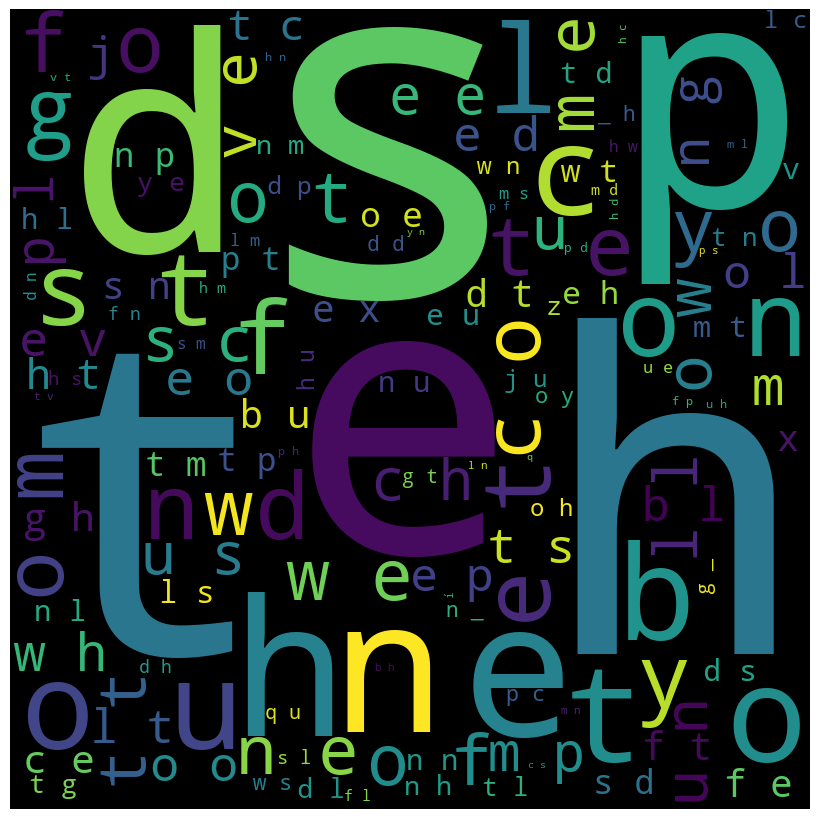

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt# Convert the lemmatized text data into a single string
text = ' '.join(df['lemmatized_text'].apply(lambda x: ' '.join(x)))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(text)

# Display the WordCloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [30]:
cleaned_df = lemmatized_text = df['clean_text'].apply(lambda x: ' '.join(x))
cleaned_df.to_csv('/workspaces/Midterm-CSC423-19S01ACS009/cleaned_adidas_tweets.csv', index=False)